In [466]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

## 파일 불러오기

In [467]:
import os
path = '../../script'

# 다큐멘터리(0), 드라마(1), 영화(2) 선택
category = 1
if category == 0:
    path = path + '/Documentary'
elif category == 1:
    path = path + '/Drama'
else:
    path = path + '/Movie'

_list = os.listdir(path)

file_list = []
for file in _list:
    if file.startswith('.'): continue
    file_list.append(file)

file_list = sorted(file_list)
print(f'작품개수: {len(file_list)}')
# print([{i:_list[i]} for i in range(len(file_list))])
for index, title in enumerate(file_list):
    print(f'{index}: {title}')

작품개수: 22
0: Anne.with.an.E
1: Ben.&.Holly's.Little.Kingdom
2: Better.Call.Saul
3: Black.Mirror
4: Breaking.Bad
5: Chico.Bon.Bon_.Monkey.with.a.Tool.Belt
6: Disenchantment
7: Friends
8: Gabbys.Dollhouse
9: How.to.Get.Away.With.Murder
10: MINDHUNTER
11: Narcos
12: PAW.Patrol
13: Peaky.Blinders
14: Peppa.Pig
15: Rick.and.Morty
16: Sherlock
17: Splash.and.Bubbles
18: Stranger.Things
19: The.Good.Doctor
20: The.Worst.Witch
21: Treehouse.Detectives_2


### 작품 선택하기

In [468]:
# 바로 위 코드에서 file_list를 참고하여 작품 선택
title = file_list[17]

file_name = 'unique_words_' + title + '.WEBRip.Netflix.en[cc]'
print(f'{path}/{title}/{file_name}')

../../script/Drama/Splash.and.Bubbles/unique_words_Splash.and.Bubbles.WEBRip.Netflix.en[cc]


In [469]:
count_df = pd.read_csv(f'{path}/{title}/{file_name}.csv', index_col='word')
display(count_df.info(), count_df)

<class 'pandas.core.frame.DataFrame'>
Index: 1831 entries, so to zooplankton
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   counts  1831 non-null   int64
dtypes: int64(1)
memory usage: 28.6+ KB


None

,counts
word,
so,274
just,239
here,226
know,215
right,180
...,...
club,1
playful,1
closed,1


## 변형형을 원형으로 변환후 다시 세기

In [470]:
# 단어 리스트 불러오기
pd.options.display.float_format = '{:.0f}'.format

word_db_df = pd.read_csv("../../words/final_datasets/words_levels_df.csv")
word_db_df
word_db_df.set_index('Word', inplace=True)

#변형어 리스트 불러오기
existing_lemmas = pd.read_csv('../../words/final_datasets/existing_lemmas_final.csv', index_col='Word')
lemmas_dict = {}
for index, row in existing_lemmas.iterrows():
  lemmas = row["Lemmas"].split(';')
  for lemma in lemmas:
    lemmas_dict[lemma] = str(index)

def convertToHeadForm(word):
  word = str(word)
  head = lemmas_dict.get(word)
  # If a lemma word, change to head word in word list
  if head:
    return head
  if word in word_db_df.index:
    return word
  else:
    # Check if adverb
    if word.endswith('ly'):
      if word[:-2] in word_db_df.index:
        print(word[:-2])
        return word[:-2]
      if word.endswith('ily'):
        if (word[:-3] + 'y') in word_db_df.index:
          print(word[:-3] + 'y')
          return word[:-3] + 'y'
      if word.endswith('ally'):
        if (word[:-4]) in word_db_df.index:
          print(word[:-4])
          return word[:-4]
      if (word[:-2] + 'e') in word_db_df.index:
        print(word[:-2] + 'e')
        return word[:-2] + 'e'
    return word

count_df.index = count_df.index.map(convertToHeadForm)
count_df

counts_df_headed = count_df.groupby(count_df.index).sum()
counts_df_headed.sort_values('counts', ascending=False, inplace=True)

counts_df_headed
# counts_df_headed.to_csv('test-about-time.csv')

,counts
word,
so,274
know,262
go,256
just,239
here,226
...,...
gesture,1
gift,1
sandy,1


## Add columns to count df

In [471]:
counts_df_headed_joined = counts_df_headed.join(word_db_df)

counts_df_headed_joined

,counts,oxford_level,oxford_version,lexile_grade,lexile_category,awsl,toefl,tsl,bsl,ngsl_freq,ngsl_sp_freq,naver_priority,lemmetized,proper_noun,word_level
word,,,,,,,,,,,,,,,
so,274,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
know,262,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
go,256,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
just,239,A1,3000,0,NN,Y,N,N,N,A1,A1,2,False,False,1
here,226,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gesture,1,B2,5000,0,NN,N,N,N,N,A3,A3,1,True,False,3
gift,1,A2,3000,0,NN,N,N,N,N,A2,A2,2,True,False,1
sandy,1,NN,0,0,NN,N,Y,N,N,B2,B3,1,True,False,3


# Group by categories

## Oxford, Lexile

In [472]:
# counts_df_headed_joined['oxford_level'] = counts_df_headed_joined['oxford_level'].fillna('NN')
# counts_df_headed_joined['lexile_grade'] = counts_df_headed_joined['lexile_grade'].fillna('0')
# counts_df_headed_joined['lexile_category'] = counts_df_headed_joined['lexile_category'].fillna('NN')
# counts_df_headed_joined['awsl'] = counts_df_headed_joined['awsl'].fillna('N')
# counts_df_headed_joined['toefl'] = counts_df_headed_joined['toefl'].fillna('N')
# counts_df_headed_joined['tsl'] = counts_df_headed_joined['tsl'].fillna('N')
# counts_df_headed_joined['bsl'] = counts_df_headed_joined['bsl'].fillna('N')

# counts_df_headed_joined['ngsl_freq'] = counts_df_headed_joined['ngsl_freq'].fillna('NN')
# counts_df_headed_joined['naver_priority'] = counts_df_headed_joined['naver_priority'].fillna('-1')

# counts_df_headed_joined['lexile_grade'] = counts_df_headed_joined['lexile_grade'].astype(int)

# counts_df_headed_joined['naver_priority'] = counts_df_headed_joined['naver_priority'].astype(int)


# counts_df_headed_joined

In [473]:
oxford = counts_df_headed_joined.groupby('oxford_level').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
oxford

oxford_result = oxford.to_frame(name='counts')
oxford_result = oxford_result.transpose()
oxford_result.rename({'counts': 'oxford'}, inplace=True)
# oxford_result.rename({'counts': 'oxford'}, inplace=True)
oxford_result.columns = range(1, len(oxford_result.columns)+1)
oxford_result.columns = [*oxford_result.columns[:-1], 'NN']

oxford_result

,1,2,3,4,5,NN
oxford,426,233,127,122,43,290


In [474]:
oxford_ver = counts_df_headed_joined.groupby('oxford_version').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
oxford_ver = oxford_ver.to_frame(name='counts')
oxford_ver = oxford_ver.transpose()
oxford_ver.rename({'counts': 'oxford_ver'}, inplace=True)
oxford_ver.drop(0, axis=1, inplace=True)
oxford_ver

oxford_version,3000,5000
oxford_ver,858,93


In [475]:
lexile = counts_df_headed_joined.groupby('lexile_grade').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
lexile
lexile = lexile.to_frame(name='counts')
lexile = lexile.transpose()
lexile.rename({'counts': 'lexile_grade'}, inplace=True)
# lexile.drop(0, axis=1, inplace=True)

lexile

lexile_grade,0,1,2,3,4,5,6,9
lexile_grade,1047,36,39,39,26,14,26,14


In [476]:
lexile_cat = counts_df_headed_joined.groupby('lexile_category').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
lexile_cat = lexile_cat.to_frame(name='counts')
lexile_cat = lexile_cat.transpose()
lexile_cat.rename({'counts': 'lexile_cat'}, inplace=True)
# lexile_cat.drop('NN', axis=1, inplace=True)
lexile_cat.rename(columns={'general': 1, 'math': 2, 'science': 3, 'social_studies': 4}, inplace=True)


lexile_cat

lexile_category,NN,1,2,3,4
lexile_cat,1047,67,8,95,24


## awsl, toefl, tsl, bsl

In [477]:
awsl = counts_df_headed_joined.groupby('awsl').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
awsl
awsl = awsl.to_frame(name='counts')
awsl = awsl.transpose()
awsl.rename({'counts': 'awsl'}, inplace=True)
awsl.rename(columns={'N':'NN', 'Y':1}, inplace=True)
# awsl.columns = [1,2]
# awsl.drop(0, axis=1, inplace=True)

awsl

awsl,NN,1
awsl,592,649


In [478]:
toefl = counts_df_headed_joined.groupby('toefl').size()
toefl
toefl = toefl.to_frame(name='counts')
toefl = toefl.transpose()
toefl.rename({'counts': 'toefl'}, inplace=True)
toefl.rename(columns={'N':'NN', 'Y':1}, inplace=True)
# toefl.drop(0, axis=1, inplace=True)

toefl

toefl,NN,1
toefl,1066,175


In [479]:
tsl = counts_df_headed_joined.groupby('tsl').size()
tsl
tsl = tsl.to_frame(name='counts')
tsl = tsl.transpose()
tsl.rename({'counts': 'tsl'}, inplace=True)
tsl.rename(columns={'N':'NN', 'Y':1}, inplace=True)
# tsl.drop(0, axis=1, inplace=True)

tsl

tsl,NN,1
tsl,1193,48


In [480]:
bsl = counts_df_headed_joined.groupby('bsl').size()
bsl
bsl = bsl.to_frame(name='counts')
bsl = bsl.transpose()
bsl.rename({'counts': 'bsl'}, inplace=True)
bsl.rename(columns={'N':'NN', 'Y':1}, inplace=True)
# bsl.drop(0, axis=1, inplace=True)

bsl

bsl,NN,1
bsl,1194,47


## NGSL, NGSL-S

In [481]:
ngsl_freq = counts_df_headed_joined.groupby('ngsl_freq').size()
ngsl_freq
ngsl_freq = ngsl_freq.to_frame(name='counts')
ngsl_freq = ngsl_freq.transpose()
ngsl_freq.rename({'counts': 'ngsl_freq'}, inplace=True)
ngsl_freq.columns = range(1, len(ngsl_freq.columns)+1)
ngsl_freq.columns = [*ngsl_freq.columns[:-1], 'NN']
# ngsl_freq.drop(0, axis=1, inplace=True)

ngsl_freq

,1,2,3,4,5,6,7,8,9,10,11,12,NN
ngsl_freq,504,240,121,43,118,65,30,56,26,13,11,2,12


In [482]:
ngsl_sp_freq = counts_df_headed_joined.groupby('ngsl_sp_freq').size()
ngsl_sp_freq
ngsl_sp_freq = ngsl_sp_freq.to_frame(name='counts')
ngsl_sp_freq = ngsl_sp_freq.transpose()
ngsl_sp_freq.rename({'counts': 'ngsl_sp_freq'}, inplace=True)
ngsl_sp_freq.columns = range(1, len(ngsl_sp_freq.columns)+1)
ngsl_sp_freq.columns = [*ngsl_sp_freq.columns[:-1], 'NN']
# ngsl_sp_freq.drop(0, axis=1, inplace=True)

ngsl_sp_freq

,1,2,3,4,5,6,7,8,9,10,NN
ngsl_sp_freq,522,238,112,39,112,64,33,55,34,6,26


In [483]:
naver_priority = counts_df_headed_joined.groupby('naver_priority').size()
naver_priority
naver_priority = naver_priority.to_frame(name='counts')
naver_priority = naver_priority.transpose()
# naver_priority.rename({'counts': 'naver_priority'}, inplace=True)
# naver_priority.rename(columns={0: 3, 1: 2, 2: 1, 3:0}, inplace=True)
# naver_priority.columns = range(1, 12)
# naver_priority.drop(0, axis=1, inplace=True)

naver_priority

naver_priority,0,1,2
counts,131,221,889


## Plot stacked bar 

In [484]:
result = pd.concat([oxford_result, lexile, lexile_cat, awsl, toefl, tsl, bsl, ngsl_freq, ngsl_sp_freq, naver_priority])
result

,0.0,1,2,3,4,5,6.0,7,8,9.0,10,11,12,NN
oxford,NaN,426,233,127,122,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290
lexile_grade,1047,36,39,39,26,14,26,NaN,NaN,14,NaN,NaN,NaN,NaN
lexile_cat,NaN,67,8,95,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1047
awsl,NaN,649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592
toefl,NaN,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1066
tsl,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1193
bsl,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1194
ngsl_freq,NaN,504,240,121,43,118,65,30,56,26,13,11,2,12
ngsl_sp_freq,NaN,522,238,112,39,112,64,33,55,34,6,NaN,NaN,26
counts,131,221,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1600x1200 with 0 Axes>

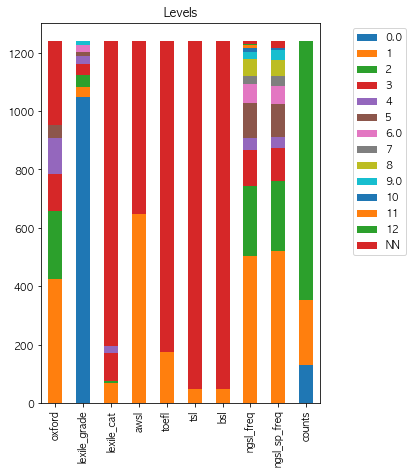

In [485]:
fig = plt.figure(figsize=(20,15), dpi=80)
plt.rcParams["figure.figsize"]=(5, 7)
result.plot.bar(stacked=True)
plt.title('Levels')
plt.legend(bbox_to_anchor=(1.1, 1))


In [486]:
display(title)

ox = counts_df_headed_joined['oxford_level'].value_counts().sort_index()
ox = pd.DataFrame(ox)
ox['%'] = ox['oxford_level'] / ox['oxford_level'].sum() * 100
display(ox)

lexile_grade = counts_df_headed_joined['lexile_grade'].value_counts().sort_index()
lexile_grade = pd.DataFrame(lexile_grade)
lexile_grade.drop(0, inplace=True)
lexile_grade['%'] = lexile_grade['lexile_grade'] / lexile_grade['lexile_grade'].sum() * 100
display(lexile_grade)

nav = counts_df_headed_joined['naver_priority'].value_counts().sort_index()
nav = pd.DataFrame(nav)
nav['%'] = nav['naver_priority'] / nav['naver_priority'].sum() * 100
display(nav)


awsl = counts_df_headed_joined['awsl'].value_counts().sort_index()
awsl = pd.DataFrame(awsl)
awsl['%'] = awsl['awsl'] / awsl['awsl'].sum() * 100
display(awsl)

toefl = counts_df_headed_joined['toefl'].value_counts().sort_index()
toefl = pd.DataFrame(toefl)
toefl['%'] = toefl['toefl'] / toefl['toefl'].sum() * 100
display(toefl)

tsl = counts_df_headed_joined['tsl'].value_counts().sort_index()
tsl = pd.DataFrame(tsl)
tsl['%'] = tsl['tsl'] / tsl['tsl'].sum() * 100
display(tsl)

bsl = counts_df_headed_joined['bsl'].value_counts().sort_index()
bsl = pd.DataFrame(bsl)
bsl['%'] = bsl['bsl'] / bsl['bsl'].sum() * 100
display(bsl)

ngsl = counts_df_headed_joined['ngsl_sp_freq'].value_counts().sort_index()
ngsl = pd.DataFrame(ngsl)
ngsl['%'] = ngsl['ngsl_sp_freq'] / ngsl['ngsl_sp_freq'].sum() * 100
display(ngsl)


'Splash.and.Bubbles'

,oxford_level,%
A1,426,34
A2,233,19
B1,127,10
B2,122,10
C1,43,3
NN,290,23


,lexile_grade,%
1,36,19
2,39,20
3,39,20
4,26,13
5,14,7
6,26,13
9,14,7


,naver_priority,%
0,131,11
1,221,18
2,889,72


,awsl,%
N,592,48
Y,649,52


,toefl,%
N,1066,86
Y,175,14


,tsl,%
N,1193,96
Y,48,4


,bsl,%
N,1194,96
Y,47,4


,ngsl_sp_freq,%
A1,522,42
A2,238,19
A3,112,9
A4,39,3
B1,112,9
B2,64,5
B3,33,3
C1,55,4
C2,34,3
C3,6,0


A1    426
A2    233
B1    127
B2    122
C1     43
NN    290
Name: oxford_level, dtype: int64

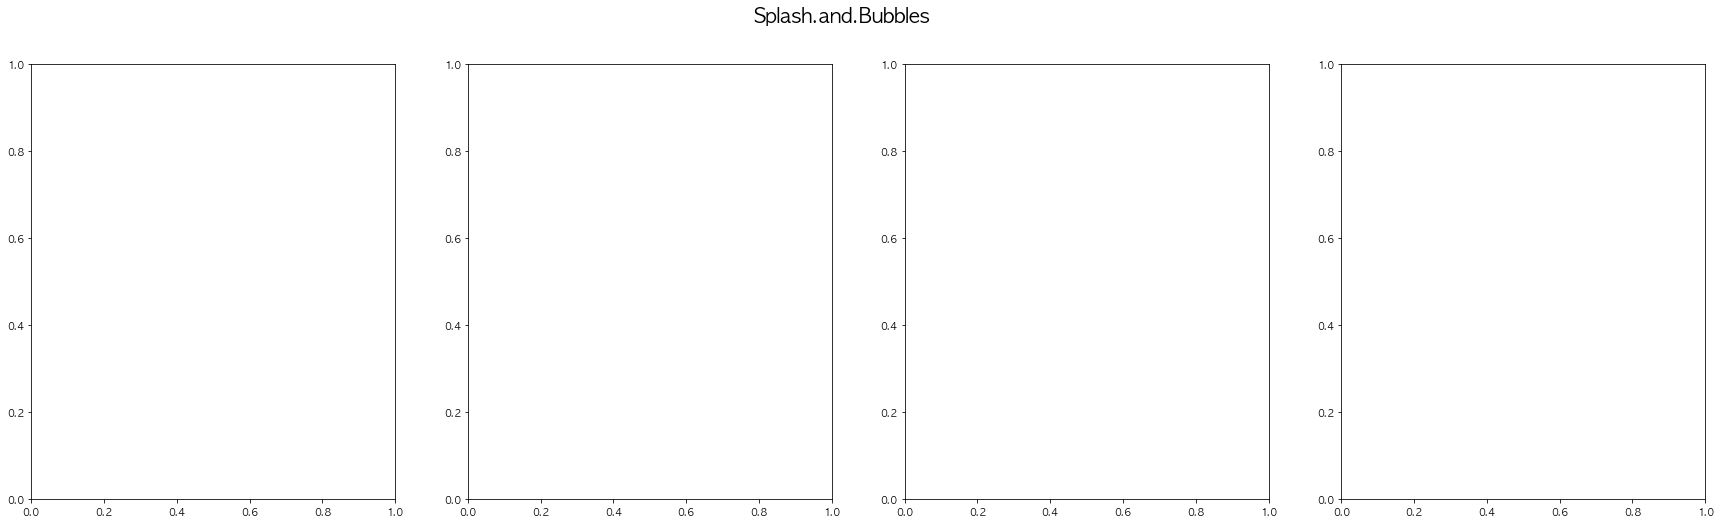

In [487]:
fig, axes = plt.subplots(1, 4, figsize=(30, 8), facecolor='white')
fig.suptitle(title, fontsize=20)
result = counts_df_headed_joined['oxford_level'].value_counts().sort_index()
result
# wedges, texts, autotexts = axes[0].pie(result, labels=result.index, autopct = "%1.0f%%")
# axes[0].set_title('Oxford Level')
# axes[0].legend(wedges, autotexts)  

# result = counts_df_headed_joined['lexile_grade'].value_counts().sort_index()
# axes[1].pie(wedges, result,  autopct = "%1.0f%%")
# axes[1].set_title('Lexile Grade')
# axes[1].legend(loc='upper right')  


# result = counts_df_headed_joined['ngsl_freq'].value_counts().sort_index()
# axes[2].pie(result, labels=result.index,  autopct = "%1.0f%%")
# axes[2].set_title('ngsl Freq')

# result = counts_df_headed_joined['ngsl_sp_freq'].value_counts().sort_index()
# axes[3].pie(result, labels=result.index,  autopct = "%1.0f%%")
# axes[3].set_title('ngsl sp Freq') 

# plt.show()